In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/kaggle/input/restuarant/Restaurant_revenue (1).csv')

In [4]:
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [5]:
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [6]:
df.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [7]:
df=df.drop(columns= ['Reviews', 'Promotions'])

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
df['Cuisine_Type']= le.fit_transform(df['Cuisine_Type'])

In [11]:
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Monthly_Revenue
0,61,43.117635,12.663793,2,36.236133,350.912040
1,24,40.020077,4.577892,1,17.952562,221.319091
2,81,41.981485,4.652911,2,22.600420,326.529763
3,70,43.005307,4.416053,1,18.984098,348.190573
4,30,17.456199,3.475052,1,12.766143,185.009121


/tmp/ipykernel_34/2915434740.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, i+1)


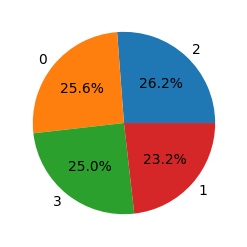

In [21]:
features = ['Cuisine_Type']
plt.subplots(figsize=(10, 5))

for i, col in enumerate(features):
  plt.subplot(1,3, i+1)
  x= df[col].value_counts()
  plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
plt.show()

In [13]:
X= df.iloc[:, :-1]
Y= df.iloc[:, -1]

In [14]:
Y

0      350.912040
1      221.319091
2      326.529763
3      348.190573
4      185.009121
          ...    
995    249.312034
996    110.228767
997    312.212552
998    272.482204
999    379.973072
Name: Monthly_Revenue, Length: 1000, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 1)

DecisionTreeRegression

In [23]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()

In [25]:
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [27]:
y_pred = dt.predict(X_test)

In [29]:
from sklearn.metrics import r2_score
acc= r2_score(Y_test, y_pred)
print(acc)

0.40134456885776704


#randomforest

In [39]:
from sklearn.ensemble import RandomForestRegressor
rft= RandomForestRegressor(n_estimators= 200)
rft.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200)

In [40]:
y2_pred = rft.predict(X_test)

In [41]:
acc2= r2_score(Y_test, y2_pred)
print(acc2)

0.6558632886712004
